In [79]:
# suppress display of warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt

# import seaborn library for an advance visualization
import seaborn as sns

# train test split
from sklearn.model_selection import train_test_split

# 'StandardScalar' from sklearn.preprocessing library is used to scale the data
from sklearn.preprocessing import StandardScaler

# 'eig' from numpy.linalg to calculate eigenvalues and eigenvectors
from numpy.linalg import eig

# 'PCA' function to perform principal component analysis using the sklearn library
from sklearn.decomposition import PCA

# 'LDA' function to perform linear discriminant analysis using the sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# import decision tree classifier and random forest classifier from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [80]:
# load the csv file
df_sales = pd.read_csv('sales_data_sample.csv', encoding= 'unicode_escape')

# display the first five observations
df_sales.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [81]:
df_sales.shape

(2823, 25)

In [82]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [83]:
percent_missing_value = df_sales. isnull(). sum() * 100 / len(df_sales)
percent_missing_value

ORDERNUMBER          0.000000
QUANTITYORDERED      0.000000
PRICEEACH            0.000000
ORDERLINENUMBER      0.000000
SALES                0.000000
ORDERDATE            0.000000
STATUS               0.000000
QTR_ID               0.000000
MONTH_ID             0.000000
YEAR_ID              0.000000
PRODUCTLINE          0.000000
MSRP                 0.000000
PRODUCTCODE          0.000000
CUSTOMERNAME         0.000000
PHONE                0.000000
ADDRESSLINE1         0.000000
ADDRESSLINE2        89.302161
CITY                 0.000000
STATE               52.639036
POSTALCODE           2.692171
COUNTRY              0.000000
TERRITORY           38.044633
CONTACTLASTNAME      0.000000
CONTACTFIRSTNAME     0.000000
DEALSIZE             0.000000
dtype: float64

In [84]:
duplicate = df_sales[df_sales.duplicated()]
  
# Print the resultant Dataframe
print(duplicate)

Empty DataFrame
Columns: [ORDERNUMBER, QUANTITYORDERED, PRICEEACH, ORDERLINENUMBER, SALES, ORDERDATE, STATUS, QTR_ID, MONTH_ID, YEAR_ID, PRODUCTLINE, MSRP, PRODUCTCODE, CUSTOMERNAME, PHONE, ADDRESSLINE1, ADDRESSLINE2, CITY, STATE, POSTALCODE, COUNTRY, TERRITORY, CONTACTLASTNAME, CONTACTFIRSTNAME, DEALSIZE]
Index: []

[0 rows x 25 columns]


In [85]:
df_sales['POSTALCODE'] = df_sales['POSTALCODE'].str.replace(r'\D', '')
df_sales['POSTALCODE'] = df_sales['POSTALCODE'].astype('float64')
df_sales['POSTALCODE'] = df_sales['POSTALCODE'].fillna(df_sales['POSTALCODE'].mode()[0])

In [86]:
df_sales['CUSTOMERNAME'].value_counts()

Euro Shopping Channel           259
Mini Gifts Distributors Ltd.    180
Australian Collectors, Co.       55
La Rochelle Gifts                53
AV Stores, Co.                   51
                               ... 
Microscale Inc.                  10
Royale Belge                      8
Auto-Moto Classics Inc.           8
Atelier graphique                 7
Boards & Toys Co.                 3
Name: CUSTOMERNAME, Length: 92, dtype: int64

In [87]:
df_sales['STATE'] = df_sales['STATE'].fillna(df_sales['STATE'].mode()[0])

In [88]:
df_sales['TERRITORY'].unique()

array([nan, 'EMEA', 'APAC', 'Japan'], dtype=object)

In [89]:
df_sales['TERRITORY'].value_counts()

EMEA     1407
APAC      221
Japan     121
Name: TERRITORY, dtype: int64

In [90]:
df_sales['TERRITORY'] = df_sales['TERRITORY'].fillna(df_sales['TERRITORY'].mode()[0])

In [91]:
df_sales['TERRITORY'].value_counts()

EMEA     2481
APAC      221
Japan     121
Name: TERRITORY, dtype: int64

In [92]:
df_sales['TERRITORY']=df_sales['TERRITORY'].replace({'EMEA':int(1),'APAC':int(2),'Japan':int(3)})

In [93]:
df_sales['DEALSIZE'].value_counts()

Medium    1384
Small     1282
Large      157
Name: DEALSIZE, dtype: int64

In [94]:
df_sales['DEALSIZE']=df_sales['DEALSIZE'].replace({'Large':int(1),'Medium':int(2),'Small':int(3)})

In [95]:
df_sales['CUSTOMERNAME'].value_counts()

Euro Shopping Channel           259
Mini Gifts Distributors Ltd.    180
Australian Collectors, Co.       55
La Rochelle Gifts                53
AV Stores, Co.                   51
                               ... 
Microscale Inc.                  10
Royale Belge                      8
Auto-Moto Classics Inc.           8
Atelier graphique                 7
Boards & Toys Co.                 3
Name: CUSTOMERNAME, Length: 92, dtype: int64

In [96]:
df_sales = df_sales.drop(['ORDERNUMBER','ORDERDATE','PHONE','ADDRESSLINE1', 'ADDRESSLINE2','CONTACTLASTNAME', 'CONTACTFIRSTNAME','PRODUCTCODE','STATE'], axis=1)
df_sales.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,CITY,POSTALCODE,COUNTRY,TERRITORY,DEALSIZE
0,30,95.70,2,2871.00,Shipped,1,2,2003,Motorcycles,95,Land of Toys Inc.,NYC,10022.0,USA,1,3
1,34,81.35,5,2765.90,Shipped,2,5,2003,Motorcycles,95,Reims Collectables,Reims,51100.0,France,1,3
2,41,94.74,2,3884.34,Shipped,3,7,2003,Motorcycles,95,Lyon Souveniers,Paris,75508.0,France,1,2
3,45,83.26,6,3746.70,Shipped,3,8,2003,Motorcycles,95,Toys4GrownUps.com,Pasadena,90003.0,USA,1,2
4,49,100.00,14,5205.27,Shipped,4,10,2003,Motorcycles,95,Corporate Gift Ideas Co.,San Francisco,28034.0,USA,1,2


In [97]:
df_sales['STATUS'].unique()

array(['Shipped', 'Disputed', 'In Process', 'Cancelled', 'On Hold',
       'Resolved'], dtype=object)

In [98]:
df_sales['STATUS'] = df_sales['STATUS'].replace({'Shipped':int(1),'Disputed':int(0),'In Process':int(0),'Cancelled':int(0), 'On Hold':int(0), 'Resolved':int(0)})

In [99]:
Total = df_sales.isnull().sum().sort_values(ascending=False)        

Percent = (df_sales.isnull().sum()*100/df_sales.isnull().count()).sort_values(ascending=False)  

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
QUANTITYORDERED,0,0.0
PRICEEACH,0,0.0
ORDERLINENUMBER,0,0.0
SALES,0,0.0
STATUS,0,0.0
QTR_ID,0,0.0
MONTH_ID,0,0.0
YEAR_ID,0,0.0
PRODUCTLINE,0,0.0
MSRP,0,0.0


In [100]:
df_sales['STATUS'].unique()

array([1, 0], dtype=int64)

Interpretation: The above output shows that there are two unique classes in the target variable. Among these classes, class 1 is most frequent with 2617 records and the other class has 206 observations. Thus we can say that the target variable is balanced.

In [101]:
y = df_sales['STATUS']

In [102]:
df_sales = df_sales.drop(['STATUS', 'POSTALCODE'], axis=1)

In [103]:
df_sales.shape

(2823, 14)

In [104]:
df_sales.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,CITY,COUNTRY,TERRITORY,DEALSIZE
0,30,95.70,2,2871.00,1,2,2003,Motorcycles,95,Land of Toys Inc.,NYC,USA,1,3
1,34,81.35,5,2765.90,2,5,2003,Motorcycles,95,Reims Collectables,Reims,France,1,3
2,41,94.74,2,3884.34,3,7,2003,Motorcycles,95,Lyon Souveniers,Paris,France,1,2
3,45,83.26,6,3746.70,3,8,2003,Motorcycles,95,Toys4GrownUps.com,Pasadena,USA,1,2
4,49,100.00,14,5205.27,4,10,2003,Motorcycles,95,Corporate Gift Ideas Co.,San Francisco,USA,1,2


In [105]:
df_sales.describe()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,TERRITORY,DEALSIZE
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000,2823.000000,2823.000000
mean,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551,1.164010,2.398512
std,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912,0.472138,0.592498
min,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000,1.000000,1.000000
25%,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000,1.000000,2.000000
50%,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000,1.000000,2.000000
75%,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000,1.000000,3.000000
max,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000,3.000000,3.000000


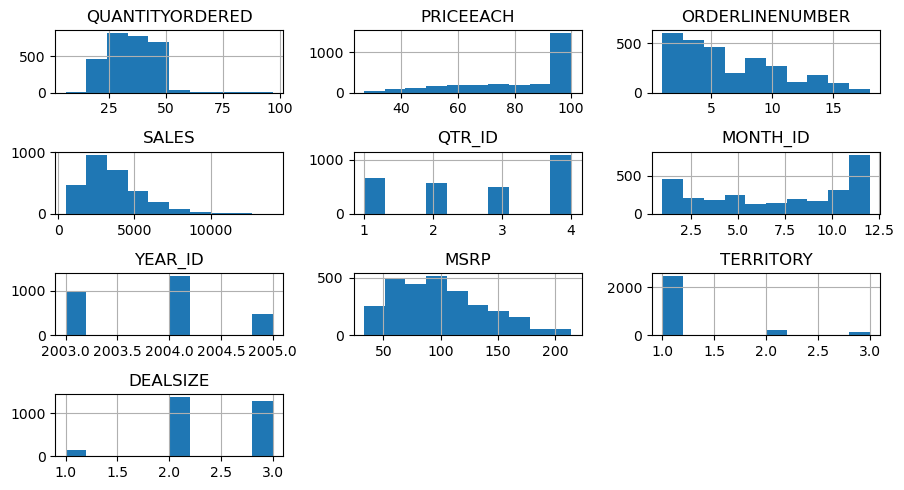

In [106]:
plt.rcParams['figure.figsize'] = [9,5]
df_sales.hist()
plt.tight_layout()
plt.show()

In [107]:
df_sales.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,CITY,COUNTRY,TERRITORY,DEALSIZE
0,30,95.70,2,2871.00,1,2,2003,Motorcycles,95,Land of Toys Inc.,NYC,USA,1,3
1,34,81.35,5,2765.90,2,5,2003,Motorcycles,95,Reims Collectables,Reims,France,1,3
2,41,94.74,2,3884.34,3,7,2003,Motorcycles,95,Lyon Souveniers,Paris,France,1,2
3,45,83.26,6,3746.70,3,8,2003,Motorcycles,95,Toys4GrownUps.com,Pasadena,USA,1,2
4,49,100.00,14,5205.27,4,10,2003,Motorcycles,95,Corporate Gift Ideas Co.,San Francisco,USA,1,2


In [108]:
dummy_df = pd.get_dummies(df_sales)
dummy_df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,TERRITORY,DEALSIZE,...,COUNTRY_Italy,COUNTRY_Japan,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA
0,30,95.70,2,2871.00,1,2,2003,95,1,3,...,0,0,0,0,0,0,0,0,0,1
1,34,81.35,5,2765.90,2,5,2003,95,1,3,...,0,0,0,0,0,0,0,0,0,0
2,41,94.74,2,3884.34,3,7,2003,95,1,2,...,0,0,0,0,0,0,0,0,0,0
3,45,83.26,6,3746.70,3,8,2003,95,1,2,...,0,0,0,0,0,0,0,0,0,1
4,49,100.00,14,5205.27,4,10,2003,95,1,2,...,0,0,0,0,0,0,0,0,0,1


In [109]:
# Use StandardScaler to scale the data
sc = StandardScaler()
sales_std =  sc.fit_transform(dummy_df)

print(sales_std)

[[-0.52289086  0.5969775  -1.05705871 ... -0.10537149 -0.23184348
   1.34601374]
 [-0.11220131 -0.11445035 -0.34701507 ... -0.10537149 -0.23184348
  -0.74293447]
 [ 0.60650538  0.54938372 -1.05705871 ... -0.10537149 -0.23184348
  -0.74293447]
 ...
 [ 0.81185016  0.81015797 -0.58369628 ... -0.10537149 -0.23184348
  -0.74293447]
 [-0.11220131 -1.06186404 -1.29373992 ... -0.10537149 -0.23184348
  -0.74293447]
 [ 1.2225397  -0.89925195  0.59970978 ... -0.10537149 -0.23184348
   1.34601374]]


### PCA FOR VISUALIZATION

Type Markdown and LaTeX:  𝛼2

In [110]:
df_sales_std = pd.DataFrame(sales_std, columns = dummy_df.columns)

In [111]:
# check the mean and standard deviation of each variable
# use 'round()' to get the integer output
print('Mean: \n', round(df_sales_std.mean()))

# print a blank line
print('\n')

print('Standard Deviation: \n', round(df_sales_std.std()))

Mean: 
 QUANTITYORDERED        0.0
PRICEEACH             -0.0
ORDERLINENUMBER        0.0
SALES                  0.0
QTR_ID                 0.0
                      ... 
COUNTRY_Spain          0.0
COUNTRY_Sweden         0.0
COUNTRY_Switzerland    0.0
COUNTRY_UK            -0.0
COUNTRY_USA            0.0
Length: 201, dtype: float64


Standard Deviation: 
 QUANTITYORDERED        1.0
PRICEEACH              1.0
ORDERLINENUMBER        1.0
SALES                  1.0
QTR_ID                 1.0
                      ... 
COUNTRY_Spain          1.0
COUNTRY_Sweden         1.0
COUNTRY_Switzerland    1.0
COUNTRY_UK             1.0
COUNTRY_USA            1.0
Length: 201, dtype: float64


Interpretation: The above output shows that all the variables have mean = 0 and standard deviation = 1. Thus we have standardized the independent variables.

In [112]:
df_sales_std.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,TERRITORY,DEALSIZE,...,COUNTRY_Italy,COUNTRY_Japan,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA
0,-0.522891,0.596978,-1.057059,-0.370825,-1.427039,-1.392909,-1.16517,-0.142246,-0.347439,1.015353,...,-0.204199,-0.136988,-0.176195,-0.096414,-0.169676,-0.371278,-0.143553,-0.105371,-0.231843,1.346014
1,-0.112201,-0.114450,-0.347015,-0.427897,-0.596243,-0.572337,-1.16517,-0.142246,-0.347439,1.015353,...,-0.204199,-0.136988,-0.176195,-0.096414,-0.169676,-0.371278,-0.143553,-0.105371,-0.231843,-0.742934
2,0.606505,0.549384,-1.057059,0.179443,0.234553,-0.025289,-1.16517,-0.142246,-0.347439,-0.672716,...,-0.204199,-0.136988,-0.176195,-0.096414,-0.169676,-0.371278,-0.143553,-0.105371,-0.231843,-0.742934
3,1.017195,-0.019759,-0.110334,0.104701,0.234553,0.248235,-1.16517,-0.142246,-0.347439,-0.672716,...,-0.204199,-0.136988,-0.176195,-0.096414,-0.169676,-0.371278,-0.143553,-0.105371,-0.231843,1.346014
4,1.427884,0.810158,1.783116,0.896740,1.065350,0.795284,-1.16517,-0.142246,-0.347439,-0.672716,...,-0.204199,-0.136988,-0.176195,-0.096414,-0.169676,-0.371278,-0.143553,-0.105371,-0.231843,1.346014


In [113]:
df_sales_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Columns: 201 entries, QUANTITYORDERED to COUNTRY_USA
dtypes: float64(201)
memory usage: 4.3 MB


In [114]:
df_sales_std.T.head()

,0,1,2,3,4,5,6,7,8,9,...,2813,2814,2815,2816,2817,2818,2819,2820,2821,2822
QUANTITYORDERED,-0.522891,-0.112201,0.606505,1.017195,1.427884,0.093143,-0.625563,1.325212,-1.344270,0.606505,...,-0.317546,-0.009529,0.503833,0.195816,0.709178,-1.549615,-0.625563,0.811850,-0.112201,1.222540
PRICEEACH,0.596978,-0.114450,0.549384,-0.019759,0.810158,0.644571,0.122527,0.810158,0.739263,0.810158,...,-1.169942,-1.197209,-1.386592,0.152769,0.669360,0.810158,0.810158,0.810158,-1.061864,-0.899252
ORDERLINENUMBER,-1.057059,-0.347015,-1.057059,-0.110334,1.783116,-1.293740,0.599710,-1.293740,-1.057059,1.783116,...,-1.293740,-0.110334,-0.347015,-0.583696,-0.347015,2.019797,-1.293740,-0.583696,-1.293740,0.599710
SALES,-0.370825,-0.427897,0.179443,0.104701,0.896740,-0.040254,-0.573498,1.063475,-0.752278,0.626949,...,-0.886199,-0.798810,-0.720207,-0.187077,0.286082,-0.711084,0.230579,1.012024,-0.780722,-0.257637
QTR_ID,-1.427039,-0.596243,0.234553,0.234553,1.065350,1.065350,1.065350,1.065350,1.065350,-1.427039,...,0.234553,1.065350,1.065350,1.065350,1.065350,1.065350,-1.427039,-1.427039,-1.427039,-0.596243


In [115]:
# generate the covariance matrix using 'cov' function
# pass the transpose of the standardized data to calculate the covariance between the variables (columns)
# by default, the 'cov()' returns the covariance between the observations (rows)
covariance_mat = np.cov(df_sales_std.T)

# print the first five elements of the matrix
covariance_mat[0:5]

array([[ 1.00035436,  0.005566  , -0.01840317, ..., -0.00344824,
        -0.00667482,  0.0323631 ],
       [ 0.005566  ,  1.00035436, -0.02097199, ...,  0.02017429,
        -0.01310552,  0.00610928],
       [-0.01840317, -0.02097199,  1.00035436, ...,  0.04631425,
         0.03654594, -0.02155582],
       [ 0.55162159,  0.65807404, -0.05842108, ...,  0.01392767,
        -0.0287562 ,  0.02406903],
       [-0.03533598,  0.00871535,  0.04072996, ..., -0.05437441,
         0.05306089,  0.05255242]])

In [116]:
covariance_mat.shape

(201, 201)

In [117]:
# use 'eig()' function to compute eigenvalues and eigenvectors of the covariance matrix
eigenvalue, eigenvector = np.linalg.eigh(covariance_mat)
print('Eigen Vectors \n%s', eigenvector)
print('\n Eigen Values \n%s', eigenvalue)

Eigen Vectors 
%s [[ 0.00000000e+00 -0.00000000e+00  0.00000000e+00 ... -9.82942981e-02
   1.54138116e-01 -2.12272132e-02]
 [ 1.88008031e-16  6.51472790e-17  3.47146553e-16 ... -8.92652228e-02
   3.07638807e-01 -3.15792201e-02]
 [ 1.18733795e-16  5.63618629e-17 -7.38205616e-17 ...  3.31587072e-02
  -3.50299366e-02  1.33667762e-02]
 ...
 [-6.97365770e-02 -4.19695023e-02  6.29360409e-03 ... -1.12493170e-01
   9.88784998e-02 -1.27124563e-02]
 [-2.42788549e-02 -2.72738622e-02  8.80139928e-02 ...  1.00071175e-01
  -8.62390059e-02 -3.21651013e-02]
 [ 8.39826105e-02  5.44928944e-02  1.18000153e-01 ...  1.48520920e-01
   1.49077094e-01 -1.90019995e-01]]

 Eigen Values 
%s [-5.59156355e-15 -3.10779000e-15 -2.75710176e-15 -2.73806605e-15
 -2.34908970e-15 -2.29291630e-15 -2.10682364e-15 -2.08960894e-15
 -1.96938310e-15 -1.92721180e-15 -1.65709051e-15 -1.63564245e-15
 -1.52755109e-15 -1.47709716e-15 -1.46372852e-15 -1.46227243e-15
 -1.34487985e-15 -1.31145319e-15 -1.31006723e-15 -1.22965164e-15
 -

In [118]:
# Computes the eigenvalues of the covariance matrix and it is stored in the array 'eigenvalue'
# convert the array into the list
list_eigenvalue = np.sort(eigenvalue.tolist())

print(list_eigenvalue)

[-5.59156355e-15 -3.10779000e-15 -2.75710176e-15 -2.73806605e-15
 -2.34908970e-15 -2.29291630e-15 -2.10682364e-15 -2.08960894e-15
 -1.96938310e-15 -1.92721180e-15 -1.65709051e-15 -1.63564245e-15
 -1.52755109e-15 -1.47709716e-15 -1.46372852e-15 -1.46227243e-15
 -1.34487985e-15 -1.31145319e-15 -1.31006723e-15 -1.22965164e-15
 -1.15132618e-15 -1.10935615e-15 -1.04947151e-15 -1.04737119e-15
 -1.03181351e-15 -1.00397980e-15 -8.99464249e-16 -8.83980721e-16
 -8.61427802e-16 -8.07161907e-16 -7.73950928e-16 -7.68275695e-16
 -7.65897311e-16 -7.29693814e-16 -7.22414685e-16 -6.60733355e-16
 -6.47641905e-16 -5.40027217e-16 -5.30780516e-16 -5.20002291e-16
 -4.88729720e-16 -4.40393571e-16 -4.21980340e-16 -3.96694422e-16
 -3.62460235e-16 -2.80832069e-16 -2.67919456e-16 -2.40871228e-16
 -2.19071029e-16 -1.81591881e-16 -1.67858231e-16 -9.73871890e-17
 -7.70319594e-17 -6.59603722e-17  4.03730165e-19  2.78716356e-18
  2.01283883e-17  2.14245662e-17  8.80850163e-17  9.19542902e-17
  1.06980416e-16  1.16196

In [119]:
eig_vec_4 = eigenvector[:,0:4]
eig_vec_4

array([[ 0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00],
       [ 1.88008031e-16,  6.51472790e-17,  3.47146553e-16,
         2.64261955e-16],
       [ 1.18733795e-16,  5.63618629e-17, -7.38205616e-17,
        -4.99871045e-17],
       [ 2.34904032e-16, -4.58792943e-17, -9.89018352e-17,
         2.36695224e-17],
       [ 8.87143861e-16, -5.58439856e-15,  2.94555217e-15,
        -4.62978203e-15],
       [-1.03870359e-15,  5.70125030e-15, -3.37612891e-15,
         4.57785114e-15],
       [ 1.89337932e-16,  1.23758448e-16, -2.67282730e-16,
         7.86579286e-17],
       [-2.87614075e-16, -7.89724335e-17, -3.46566610e-16,
        -1.87789457e-16],
       [-2.31730482e-02,  1.07818161e-02, -1.76095371e-01,
         6.11343094e-02],
       [ 2.68014777e-16, -1.31838984e-16, -1.31838984e-16,
         2.11636264e-16],
       [-5.55381333e-02,  3.09552436e-02, -1.64770805e-02,
         2.81918661e-02],
       [-3.76510482e-02,  2.09855337e-02, -1.11703313e-02,
      

In [120]:
new_data = np.dot(df_sales_std, eig_vec_4)

# create the dataframe using the 'DataFrame()'
# pass the required column names to the parameter 'columns'
df_pca = pd.DataFrame(new_data, columns = ['PC1', 'PC2', 'PC3', 'PC4'])

# head() to display top five rows
df_pca.head()

,PC1,PC2,PC3,PC4
0,-6.804242e-16,7.312701e-16,1.789694e-15,1.280160e-15
1,-1.093065e-15,-3.414533e-16,6.937118e-16,3.398409e-15
2,5.722690e-16,1.823482e-15,1.748424e-15,-5.705420e-15
3,-1.457580e-15,6.757590e-16,3.741593e-16,-2.186408e-16
4,-1.679625e-15,5.369811e-16,-4.029968e-16,2.254484e-16


In [121]:
df_pca.shape

(2823, 4)

Interpretation: We have obtained the new dataset with only 4 dimensions. Thus we have reduced the number of variables from 203 to 4.

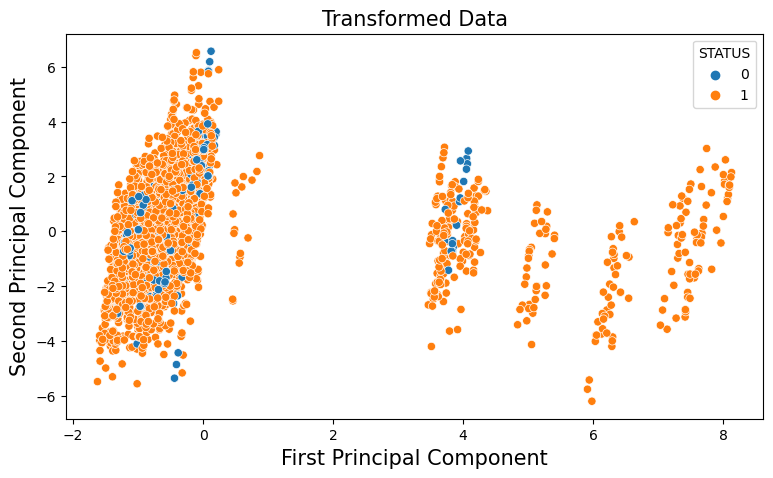

In [122]:
# use the 'PCA()' from the sklearn library to reduce the number of features 
# specify required no of components to 'n_components'
# pass the 'random_state' to produce the same results for each code run
pca = PCA(n_components = 2, random_state = 10)  

# fit the PCA and transform the standardized data
pca_2 = pca.fit_transform(df_sales_std)
# pca.fit_transform(df_sales_std)

# create the dataframe using the 'DataFrame()'
# pass the required column names to the parameter 'columns'
df_pca_2 = pd.DataFrame(pca_2, columns = ['PC1', 'PC2'])

# plot a scatterplot to visualize the dataset
# pass the variables on x and y axes to the parameter 'x' and 'y' respectively
# pass the dataframe to the parameter 'data'
# pass the target variable to the parameter 'hue' to display the classes of the target variables with different colors
sns.scatterplot(x = 'PC1', y = 'PC2', data = df_pca_2, hue =y)
# sns.set(rc={'figure.figsize':(15.7,8.27)})

# set the plot title and axes labels
# set the text size using 'fontsize'
plt.title('Transformed Data', fontsize = 15)
plt.xlabel('First Principal Component', fontsize = 15)
plt.ylabel('Second Principal Component', fontsize = 15)

# display the plot
plt.show()

Interpretation: The above plot shows the maximum variation in the data along the first principal component.

In [123]:
df_sales_std.shape, df_pca_2.shape

((2823, 201), (2823, 2))

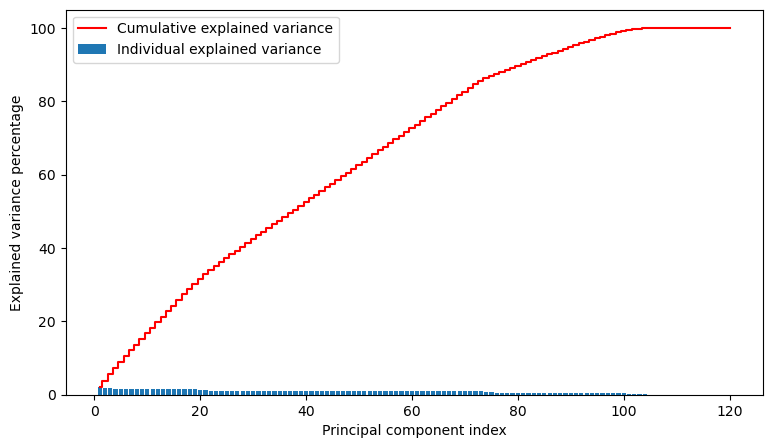

In [124]:
pca = PCA(n_components=120)
pca.fit(df_sales_std)

exp_var = pca.explained_variance_ratio_ * 100
cum_exp_var = np.cumsum(exp_var)

plt.bar(range(1,121), exp_var, align='center',
        label='Individual explained variance')

plt.step(range(1,121), cum_exp_var, where='mid',
         label='Cumulative explained variance', color='red')

plt.ylabel('Explained variance percentage')
plt.xlabel('Principal component index')
#plt.xticks(ticks=[1, 2, 3, 4])
plt.legend(loc='best')
#plt.tight_layout()

In [125]:
print("Variance Explained by all 201 principal components:",
      sum(pca.explained_variance_ratio_ * 100))

Variance Explained by all 201 principal components: 99.99999999999999


In [126]:
print("Variance Explained by the First principal components:",
      np.cumsum(pca.explained_variance_ratio_ * 100)[0])
print("Variance Explained by the First 2 principal components:",
      np.cumsum(pca.explained_variance_ratio_ * 100)[1])
print("Variance Explained by the First 3 principal components:",
      np.cumsum(pca.explained_variance_ratio_ * 100)[2])
print("Variance Explained by the First 81 principal components:",
      np.cumsum(pca.explained_variance_ratio_ * 100)[81])

Variance Explained by the First principal components: 2.0427284694848438
Variance Explained by the First 2 principal components: 3.857112518843583
Variance Explained by the First 3 principal components: 5.663425155919864
Variance Explained by the First 81 principal components: 90.7721627763747


In [127]:
pca_90 = PCA(n_components=0.90 ,  random_state=42)
pca_90.fit(df_sales_std)
l_pca_90 = pca_90.transform(df_sales_std)

In [128]:
l_pca_90.shape

(2823, 81)

Interpretation:From the above output we can say that we need approxiamately 81 components to explain 90% of explained variance.

## LDA

In [129]:
cols = []
for i in range(1,82):
  z = 'PC'+str(i)
  cols.append(z)
print(cols)

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37', 'PC38', 'PC39', 'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46', 'PC47', 'PC48', 'PC49', 'PC50', 'PC51', 'PC52', 'PC53', 'PC54', 'PC55', 'PC56', 'PC57', 'PC58', 'PC59', 'PC60', 'PC61', 'PC62', 'PC63', 'PC64', 'PC65', 'PC66', 'PC67', 'PC68', 'PC69', 'PC70', 'PC71', 'PC72', 'PC73', 'PC74', 'PC75', 'PC76', 'PC77', 'PC78', 'PC79', 'PC80', 'PC81']


In [130]:
y.value_counts()

1    2617
0     206
Name: STATUS, dtype: int64

In [131]:
n_df_sales = pd.DataFrame(l_pca_90,columns = cols)
n_df_sales['label']=y
n_df_sales.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,label
0,-0.836195,0.361842,-0.362421,2.459633,0.579356,-0.301285,-0.008573,0.210497,0.207899,0.027658,...,0.500266,-2.468115,0.269947,1.726857,0.564026,-2.190835,-0.226651,-1.655485,-0.228075,1
1,-0.172357,-1.538840,1.445937,0.867107,-3.268791,-3.167658,1.063851,0.897608,0.112468,0.191472,...,-0.974109,-0.011798,0.595816,0.778874,0.142431,-0.006628,-0.964464,-0.665500,0.757848,1
2,-0.506021,0.437002,1.345448,0.340939,-3.237021,-3.550258,1.247601,0.638229,0.143033,-0.082310,...,0.548083,0.983226,2.117069,1.038161,1.673371,1.853042,-2.593978,-1.490080,-2.999467,1
3,-0.980063,0.882171,-0.473764,2.447342,0.517715,-0.531241,-0.268490,0.236811,0.264314,-0.137174,...,-1.087265,1.414742,0.595430,0.464096,-0.283632,0.137867,-0.383932,0.245871,0.130315,1
4,-1.245282,1.763102,-1.543754,1.675224,0.667932,-0.627584,-0.127549,0.152431,0.210883,-0.219886,...,-0.470853,0.486571,-0.278240,0.995442,-2.270820,-0.711360,1.273139,0.127298,0.718363,1


In [132]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df_sales_std, y, test_size = 0.2, random_state = 42)

# check the shape of the train and test sets
print('X_train_raw:', X_train_raw.shape)
print('y_train:', y_train.shape)
print('X_test_raw:', X_test_raw.shape)
print('y_test:', y_test.shape)

X_train_raw: (2258, 201)
y_train: (2258,)
X_test_raw: (565, 201)
y_test: (565,)


Interpretation: we are spliting our original dataset into train and test sets. The train set consists of 80% of the total observations and the test set contains the remaining 20% of observations.

In [133]:
# the 'PCA()' from the sklearn library to reduce the number of features 
# specify required no of components to 'n_components'
# pass the 'random_state' to produce the same results for each code run
pca = PCA(n_components = 2, random_state = 10)  

# fit the PCA on train data and transform the train and test sets
# the 'fit_transform()' fits the PCA on the data and performs dimension reduction
X_train_pca = pca.fit_transform(X_train_raw)
X_test_pca = pca.transform(X_test_raw)

# check the dimension of the transformed data
print('Train set:', X_train_pca.shape)
print('Test set:', X_test_pca.shape)

Train set: (2258, 2)
Test set: (565, 2)


Interpretation: From the above output we can see that the number of features are reduced from 203 to 2.

In [134]:
def randomforest_model_run(X_train, X_test, y_train, y_test):
    
    # create a random forest classifier object
    # pass the random state to obtain the reproducible results
    rf_clf = RandomForestClassifier(random_state=1)
    
    # fit the random forest model on the train data
    rf_clf.fit(X_train, y_train)
    
    # predict the output values for test set
    y_pred = rf_clf.predict(X_test)
    
    # calculate accuracy for test set
    test_acc = accuracy_score(y_test, y_pred)
    
    # return the test accuracy 
    return print('Test Accuracy:', test_acc)

Interpretation: The above code returns the accuracy of the random forest classifier for the test set given the train and test sets as input parameters.

In [135]:
X_train_raw.shape, X_train_pca.shape

((2258, 201), (2258, 2))

In [136]:
%%time
# '%%time' records the time required to execute the code

# pass the train and test set of the untransformed data
randomforest_model_run(X_train_raw, X_test_raw, y_train, y_test)

Test Accuracy: 0.9787610619469026
CPU times: total: 766 ms
Wall time: 746 ms


Interpretation: From the above outputs we can see that the random forest classifier builds on the untransformed data is 97.69% accurate on the test set.

In [137]:
%%time
# '%%time' records the time required to execute the code

# pass the train and test set of the PCA-transformed data

randomforest_model_run(X_train_pca, X_test_pca, y_train, y_test)

Test Accuracy: 0.904424778761062
CPU times: total: 703 ms
Wall time: 706 ms


In [138]:
lda = LDA(n_components = 1)

# fit and transform the LDA on train data using the 'fit_transform()' 
X_train_lda = lda.fit_transform(X_train_raw, y_train)

# transform the test data 
X_test_lda = lda.transform(X_test_raw)

In [139]:
X_train_lda.shape, X_test_lda.shape

((2258, 1), (565, 1))

In [140]:
%%time
randomforest_model_run(X_train_lda, X_test_lda, y_train, y_test)

Test Accuracy: 0.9238938053097345
CPU times: total: 578 ms
Wall time: 581 ms


Interpretation: The output shows that the random forest classifier builds on the dataset transformed using PCA (i.e. data with 2 principal components) is 92.38% accurate on the test set. But we can notice that the time required to execute the code is less for PCA transformed data.